In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from ydata_profiling import ProfileReport

#### This is a comprehensive project dedicated to the analysis of patterns in terrorism from 1970 to 2022 in seven major cities of the United States. This notebook includes inititial data exploration and wrangling.

#### My data is available in two csvs: one contains data from 1970 - 2020 and the other from 2020 - 2022. I will need to import, check for consistency, and concatenate these datasets. 

In [3]:
file_path = r"C:\Users\casti\OneDrive\Documents\A Springboard\Capstone 2 - Global Terrorism\data\raw\globalterrorismdb_0522dist.xlsx"

gtd = pd.read_excel(file_path)

In [4]:
file_path2 = r"C:\Users\casti\OneDrive\Documents\A Springboard\Capstone 2 - Global Terrorism\data\raw\globalterrorismdb_2021Jan-June_1222dist.xlsx"

gtd2 = pd.read_excel(file_path2)

In [5]:
gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
gtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(54), int64(23), object(57)
memory usage: 216.0+ MB


In [7]:
gtd2.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,202101010004,2021,1,1,NaN,0,NaT,60,Egypt,10,...,NaN,"""Egyptian officials: Roadside bombing in Sinai...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
1,202101010005,2021,1,1,01/01/2021,0,NaT,92,India,6,...,NaN,"""Terror module busted, seven arrested in J&K,""...","""Militants throw grenade on CRPF,"" HT Syndicat...",NaN,START Primary Collection,-9,-9,0,-9,NaN
2,202101010006,2021,1,1,NaN,0,NaT,228,Yemen,10,...,There is doubt that this incident meets terror...,"""Civilian reportedly dies of injuries from Hou...","""UN troubled by civilian deaths in Yemen's Hud...","""Five women killed in Yemen wedding attack,"" G...",START Primary Collection,0,0,0,0,NaN
3,202101010009,2021,1,1,NaN,0,NaT,4,Afghanistan,6,...,There is doubt that this incident meets terror...,"""Afghanistan- Ghor Provincial Council Member K...","""Journalist killed on 1st day of new year in A...","""Afghanistan: 2021 Begins with Assassination o...",START Primary Collection,-9,-9,0,-9,NaN
4,202101010024,2021,1,2,NaN,0,NaT,182,Somalia,11,...,NaN,"""Jubbaland lawmaker killed in car bomb blast,""...","""Somali lawmaker killed in a sticky bomb attac...","""Al-Shabab claims killing regional MP in south...",START Primary Collection,0,0,0,0,NaN


In [8]:
gtd2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(51), int64(29), object(54)
memory usage: 5.1+ MB


#### Looks like both datasets have 135 columns that appear to be the same at a quick glance. Let's take a look to see if they really do match up one for one. 

In [9]:
columns1 = list(gtd.columns)
columns2 = list(gtd2.columns)

for x in columns1 :
    if x not in columns2:
        print(f"{x} from GTD1 is not in GTD2.")
for y in columns2 :
    if y not in columns1:
        print(f"{y} from GTD2 is not in GTD1.")

#### No print messages. Looks good. Time to concatenate. 

In [10]:
gtdbig = pd.concat([gtd, gtd2], join='outer',ignore_index=True)

In [11]:
gtdbig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214666 entries, 0 to 214665
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(54), int64(23), object(57)
memory usage: 221.1+ MB


#### The GTD source documentation indicates that the United States has a country code 217. Just a quick doublecheck to make sure that's the case.

In [12]:
gtdbig.loc[gtdbig['country']==217].country_txt.unique()

array(['United States'], dtype=object)

#### Appears that country 217 is all US. Now I need to consolidate it to a new df. 

In [13]:
gtdus = gtdbig.loc[gtdbig['country']==217,:]
print(gtdus.info())
gtdus.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3147 entries, 5 to 211177
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(54), int64(23), object(57)
memory usage: 3.3+ MB
None


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
5,197001010002,1970,1,1,NaN,0,NaT,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
7,197001020002,1970,1,2,NaN,0,NaT,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaT,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaT,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN
10,197001050001,1970,1,1,NaN,0,NaT,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


#### Just a quick look to make sure my target cities are in here: New York, Washington DC, Chicago, Miami, Houston, Los Angeles, and Seattle. 

In [14]:
gtduscity = sorted(list(gtdus.city.unique()))
gtduscity

['Acworth',
 'Afton',
 'Aguada',
 'Aguadilla',
 'Aibonito',
 'Akron',
 'Alameda',
 'Alamogordo',
 'Albany',
 'Albertville',
 'Albion',
 'Albuquerque',
 'Alexandria',
 'Alhambra',
 'Altadena',
 'Alto',
 'Alton',
 'Amarillo',
 'Ames',
 'Amherst',
 'Anaheim',
 'Anamosa',
 'Anderson',
 'Andrews',
 'Ankeny',
 'Ann Arbor',
 'Annapolis',
 'Antioch',
 'Appleton',
 'Aptos',
 'Arcata',
 'Arecibo',
 'Arivaca',
 'Arlington',
 'Arvada',
 'Asbury',
 'Asheville',
 'Ashland',
 'Ashville',
 'Astoria',
 'Athens',
 'Atherton',
 'Atkins',
 'Atlanta',
 'Auburn',
 'Augusta',
 'Aurora',
 'Austin',
 'Axton',
 'Aztec',
 "Bailey's Crossroads",
 'Bakersfield',
 'Baldwin Park',
 'Baltimore',
 'Baraboo',
 'Barnegat',
 'Batavia',
 'Baton Rouge',
 'Baxter Springs',
 'Bayamon',
 'Beaumont',
 'Bedford Park',
 'Bel Air',
 'Bellevue',
 'Bellflower',
 'Bellingham',
 'Belmont',
 'Ben Lomond',
 'Bend',
 'Berkeley',
 'Berlin',
 'Bessemer',
 'Bethesda',
 'Beverly Hills',
 'Biggsville',
 'Billings',
 'Birmingham',
 'Blooming 

#### It looks like Washington DC is "Washington" and New York is both "New York" and "New York City". Just to ensure no mistake, here's a quick check to make sure these cities are in the database.

In [15]:
mycities = ['New York','New York City','Washington','Chicago','Miami','Houston','Los Angeles','Seattle']

for x in mycities :
    if x in gtduscity:
        print(f"{x} is in the database.")
    else:
        print(f"{x} is not in the database.")

New York is in the database.
New York City is in the database.
Washington is in the database.
Chicago is in the database.
Miami is in the database.
Houston is in the database.
Los Angeles is in the database.
Seattle is in the database.


#### We're all set. Time for an even more consolidated df just for my cities.

In [16]:
gtdmycities = gtdbig[gtdbig['city'].isin(mycities)]
print(gtdmycities.city.unique())
print(gtdmycities.info())

['New York City' 'Seattle' 'Chicago' 'Los Angeles' 'Washington' 'Houston'
 'Miami' 'New York']
<class 'pandas.core.frame.DataFrame'>
Index: 904 entries, 17 to 210889
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(54), int64(23), object(57)
memory usage: 960.5+ KB
None


#### First, check for duplicate values and address that. This dataset includes a recorded event for every instance, even if instances were related. So, each event id should be unique, but all other info across other features may be identical. 

In [17]:
gtdmycities.duplicated(subset='eventid').any()

False

In [18]:
pd.set_option('display.max_columns', None)
col_to_check = [col for col in gtdmycities.columns if col != 'eventid']
potential_dup = gtdmycities.duplicated(subset=col_to_check, keep=False)
gtdmycities[potential_dup]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
962,197108220001,1971,8,22,NaN,0,NaT,217,United States,1,North America,New York,New York City,40.697132,-73.931351,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,1,Business,7.0,Retail/Grocery/Bakery,NaN,Grocery,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Armed Revolutionary Independence Movement (MIRA),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,0,1,NaN
964,197108220003,1971,8,22,NaN,0,NaT,217,United States,1,North America,New York,New York City,40.697132,-73.931351,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,1,Business,7.0,Retail/Grocery/Bakery,NaN,Grocery,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Armed Revolutionary Independence Movement (MIRA),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,0,1,NaN
4591,197703110004,1977,3,11,NaN,0,NaT,217,United States,1,North America,New York,New York City,40.697132,-73.931351,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,0,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,NaN,Puerto Rican Economic Office,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent Armed Revolutionary Commandos (CRIA),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incendiary,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,1,0,0,1,NaN
4593,197703110007,1977,3,11,NaN,0,NaT,217,United States,1,North America,New York,New York City,40.697132,-73.931351,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0.0,0,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,2,Government (General),21.0,Government Building/Facility/Office,NaN,Puerto Rican Economic Office,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent Armed Revolutionary Commandos (CRIA),NaN,NaN,NaN,NaN,NaN,NaN,0.0,Na

In [19]:
pd.reset_option('display.max_columns')

In [20]:
gtd_nodup = gtdmycities.drop_duplicates(subset=col_to_check)

In [21]:
col_to_check = [col for col in gtd_nodup.columns if col != 'eventid']
gtd_nodup.duplicated(subset=col_to_check, keep=False).any()

False

#### Great, got rid of the complete duplicates. This dataset is pretty well maintained, so I don't think I need to worry much about other duplicates - some recorded incidents have several related incidents, but fatality and casualty metrics are distributed evenly across incidents in these cases. To adequately understand this, I will be sure to keep the 'related' column.

#### Now time to figure out null values and trim features down to 30-35 instead of 135. 

In [22]:
gtd_nodup.isna().sum()

eventid         0
iyear           0
imonth          0
iday            0
approxdate    895
             ... 
INT_LOG         0
INT_IDEO        0
INT_MISC        0
INT_ANY         0
related       730
Length: 135, dtype: int64

In [23]:
allna = gtd_nodup.isna().sum().sort_values(ascending = False)
allna

gsubname3           900
weapsubtype4_txt    900
weaptype4           900
weaptype4_txt       900
weapsubtype4        900
                   ... 
crit2                 0
crit1                 0
property              0
vicinity              0
eventid               0
Length: 135, dtype: int64

In [24]:
na_dict = allna.to_dict()

In [25]:
na_dict

{'gsubname3': 900,
 'weapsubtype4_txt': 900,
 'weaptype4': 900,
 'weaptype4_txt': 900,
 'weapsubtype4': 900,
 'gname3': 899,
 'gsubname2': 899,
 'claim3': 899,
 'claimmode3': 899,
 'claimmode3_txt': 899,
 'attacktype3_txt': 899,
 'guncertain3': 899,
 'attacktype3': 899,
 'ransompaid': 897,
 'divert': 897,
 'ransompaidus': 897,
 'corp3': 896,
 'ransomamtus': 896,
 'ransomnote': 896,
 'target3': 895,
 'targsubtype3_txt': 895,
 'natlty3': 895,
 'targsubtype3': 895,
 'targtype3_txt': 895,
 'targtype3': 895,
 'approxdate': 895,
 'natlty3_txt': 895,
 'claimmode2': 894,
 'claimmode2_txt': 894,
 'resolution': 894,
 'kidhijcountry': 894,
 'ransomamt': 894,
 'claim2': 893,
 'guncertain2': 891,
 'gname2': 891,
 'weapsubtype3': 891,
 'weapsubtype3_txt': 891,
 'ndays': 890,
 'nreleased': 889,
 'gsubname': 889,
 'weaptype3': 889,
 'weaptype3_txt': 889,
 'nhours': 887,
 'attacktype2_txt': 886,
 'attacktype2': 886,
 'hostkidoutcome_txt': 884,
 'hostkidoutcome': 884,
 'compclaim': 884,
 'corp2': 879,
 

In [26]:
len(na_dict)

135

In [27]:
na_keep = {k:v for k,v in na_dict.items() if v < 300}
len(na_keep)

49

#### The na_dict is very helpful to see which columns are missing the most values. My df has 904 total entries, so I certainly don't want to be missing any more than a third of important features just for the sake of analysis. If I keep only those columns that are missing less than 300 values, I end up with 49 columns - that's 86 columns trimmed just from lack of data. 

#### An important note according to the source documentation: many of these columns are subtypes of other columns or intentionally left blank if values are 0 or not applicable. So, removing based on null values is helpful, but most of these are not numeric measurements - they're categories. I need to keep that in mind as I comb through each column and decide what to keep and what to drop. 

In [28]:
col_del = {k:v for k,v in na_dict.items() if v > 300}
col_keep = ['addnotes','nkillter','propextent', 'related']
for item in col_keep :
    del col_del[item]

#### I'm removing columns based on the 300+null threshold, but I'm keeping four that don't meet this criteria: 

##### addnotes is helpful for any additional info not captured in the features
##### nkillter is an important indicator of response success and is left blank for value = 0
##### propextent gives the extent of property damage if there was any - this is much more helpful than the 'property' feature which only tells whether property damage occured. This is an example of a subtype being much more helpful than a type.
##### related records which, if any, other incidents are related to a specific row

#### Below, I've decided to remove 17 columns based on input from the source documentation. Here's a quick overview of every removal:

##### The following are unnecessary info and not systematically determined before 1997: 'doubtterr','multiple/
##### Since this is a city specific analysis, the following are unncessary: 'country', 'country_txt', 'region', 'region_txt', 'provstate'
##### The following are text variables that only act as labels for categories recorded in other columns, which I can interpret via the source documentation: 'attacktype_txt', 'weaptype1_txt', 'weabsubtype1_txt', 'targtype1_txt,' 'targsubtype1_txt', 'natlty1_txt'
##### The following is inferred from other variables as it is a logical derivative of 'gname': 'individual'
##### As previously mentioned, 'propextent' is more helpful than 'property' and thus will replace 'property'
##### The following fields contain no nulls, but they're associated subcategories contain 880+ nulls, indicating that these are mostly unhelpful and contain primarily filler values: 'ishostkid', 'ransom'

In [29]:
col_to_drop = [feature for feature in col_del.keys()]
more_del = ['doubtterr','multiple','country','country_txt','region','region_txt','provstate','attacktype1_txt','weaptype1_txt','weapsubtype1_txt','targtype1_txt','targsubtype1_txt','natlty1_txt','individual','property','ishostkid','ransom']
for item in more_del :
    col_to_drop.append(item)
col_to_drop

['gsubname3',
 'weapsubtype4_txt',
 'weaptype4',
 'weaptype4_txt',
 'weapsubtype4',
 'gname3',
 'gsubname2',
 'claim3',
 'claimmode3',
 'claimmode3_txt',
 'attacktype3_txt',
 'guncertain3',
 'attacktype3',
 'ransompaid',
 'divert',
 'ransompaidus',
 'corp3',
 'ransomamtus',
 'ransomnote',
 'target3',
 'targsubtype3_txt',
 'natlty3',
 'targsubtype3',
 'targtype3_txt',
 'targtype3',
 'approxdate',
 'natlty3_txt',
 'claimmode2',
 'claimmode2_txt',
 'resolution',
 'kidhijcountry',
 'ransomamt',
 'claim2',
 'guncertain2',
 'gname2',
 'weapsubtype3',
 'weapsubtype3_txt',
 'ndays',
 'nreleased',
 'gsubname',
 'weaptype3',
 'weaptype3_txt',
 'nhours',
 'attacktype2_txt',
 'attacktype2',
 'hostkidoutcome_txt',
 'hostkidoutcome',
 'compclaim',
 'corp2',
 'natlty2_txt',
 'natlty2',
 'targsubtype2',
 'nhostkid',
 'nhostkidus',
 'targsubtype2_txt',
 'target2',
 'targtype2_txt',
 'targtype2',
 'weapsubtype2_txt',
 'weapsubtype2',
 'weaptype2',
 'weaptype2_txt',
 'alternative',
 'alternative_txt',
 '

In [30]:
gtdtrim = gtd_nodup.drop(columns = col_to_drop)

In [31]:
gtdtrim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 17 to 210889
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   eventid       900 non-null    int64  
 1   iyear         900 non-null    int64  
 2   imonth        900 non-null    int64  
 3   iday          900 non-null    int64  
 4   extended      900 non-null    int64  
 5   city          900 non-null    object 
 6   latitude      900 non-null    float64
 7   longitude     900 non-null    float64
 8   specificity   900 non-null    float64
 9   vicinity      900 non-null    int64  
 10  crit1         900 non-null    int64  
 11  crit2         900 non-null    int64  
 12  crit3         900 non-null    int64  
 13  success       900 non-null    int64  
 14  suicide       900 non-null    int64  
 15  attacktype1   900 non-null    int64  
 16  targtype1     900 non-null    int64  
 17  targsubtype1  848 non-null    float64
 18  target1       884 non-null    o

In [32]:
gtdtrim.isna().sum()

eventid           0
iyear             0
imonth            0
iday              0
extended          0
city              0
latitude          0
longitude         0
specificity       0
vicinity          0
crit1             0
crit2             0
crit3             0
success           0
suicide           0
attacktype1       0
targtype1         0
targsubtype1     52
target1          16
natlty1           4
gname             0
guncertain1       0
weaptype1         0
weapsubtype1     98
weapdetail      110
nkill            36
nkillter        440
nwound           38
propextent      473
addnotes        618
dbsource          0
INT_LOG           0
INT_IDEO          0
INT_MISC          0
INT_ANY           0
related         730
dtype: int64

#### Looks like I have a few nulls to deal with as well as several features to re-type. Most features containing integers are actually categories, and the year/month/day columns should be consolidated to a datetime date feature.

#### Concerning datatypes, I'll create a dictionary of my column names and desired data types that I can pass through astype(). This is a slow manual process but worth the attention to detail. All new types are based on the GTD source documentation.

In [33]:
gtdtrimcol = [x for x in gtdtrim.columns]
dtypes = ['str'] + ['int64']*4 + ['str'] + ['float64']*2 + ['category']*10 + ['str'] + ['category'] + ['str'] + ['category']*3 + ['str'] + ['int']*3 + ['category'] + ['str']*2 + ['category']*4+['str']
types_dict = dict(zip(gtdtrimcol, dtypes))
types_dict


{'eventid': 'str',
 'iyear': 'int64',
 'imonth': 'int64',
 'iday': 'int64',
 'extended': 'int64',
 'city': 'str',
 'latitude': 'float64',
 'longitude': 'float64',
 'specificity': 'category',
 'vicinity': 'category',
 'crit1': 'category',
 'crit2': 'category',
 'crit3': 'category',
 'success': 'category',
 'suicide': 'category',
 'attacktype1': 'category',
 'targtype1': 'category',
 'targsubtype1': 'category',
 'target1': 'str',
 'natlty1': 'category',
 'gname': 'str',
 'guncertain1': 'category',
 'weaptype1': 'category',
 'weapsubtype1': 'category',
 'weapdetail': 'str',
 'nkill': 'int',
 'nkillter': 'int',
 'nwound': 'int',
 'propextent': 'category',
 'addnotes': 'str',
 'dbsource': 'str',
 'INT_LOG': 'category',
 'INT_IDEO': 'category',
 'INT_MISC': 'category',
 'INT_ANY': 'category',
 'related': 'str'}

#### Before I run this types_dict through astypes(), I can go ahead and fill the null integer values with 0, "Unspecified," or "None" as they are left blank when these values are 0 or unknown depending on the feature. 

In [34]:
gtdtrim.nkill.fillna(0, inplace=True)
gtdtrim.nkillter.fillna(0, inplace=True)
gtdtrim.nwound.fillna(0, inplace=True)
gtdtrim.targsubtype1.fillna(0, inplace=True)
gtdtrim.target1.fillna('Unspecified', inplace=True)
gtdtrim.natlty1.fillna('Unspecified', inplace=True)
gtdtrim.weapsubtype1.fillna(0, inplace=True)
gtdtrim.propextent.fillna(0, inplace=True)
gtdtrim.related.fillna('None', inplace=True)

In [35]:
gtd_adj_types = gtdtrim.astype(types_dict)
gtd_adj_types.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 17 to 210889
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   eventid       900 non-null    object  
 1   iyear         900 non-null    int64   
 2   imonth        900 non-null    int64   
 3   iday          900 non-null    int64   
 4   extended      900 non-null    int64   
 5   city          900 non-null    object  
 6   latitude      900 non-null    float64 
 7   longitude     900 non-null    float64 
 8   specificity   900 non-null    category
 9   vicinity      900 non-null    category
 10  crit1         900 non-null    category
 11  crit2         900 non-null    category
 12  crit3         900 non-null    category
 13  success       900 non-null    category
 14  suicide       900 non-null    category
 15  attacktype1   900 non-null    category
 16  targtype1     900 non-null    category
 17  targsubtype1  900 non-null    category
 18  target1    

#### Looks good! But I still need a date column based on the three date features given. Before I convert to datetime, I want to make sure these columns don't contain any non-date values as fillers. Any datetime converter function will struggle to deal with that.

In [36]:
print(gtd_adj_types.imonth.unique())
print(gtd_adj_types.iday.unique())
print(gtd_adj_types.iyear.unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[12 13 19 25 26 28  2  3  6  8  9 15 17 20 21  5 14 22 24 31  1  4 29  7
 10 16 27 30 18 23 11  0]
[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]


#### Ah, looks like the 'iday' column contains 0! There's no such thing as day 0. This will be the source of many errors if I don't fix it - according to the source documentation, 0 indicates an unspecified day. If I have several of these 0's, I will probably need to remove those entries or consolidate to year-month only. But if I only have a few, I can impute with adequate context.

In [37]:
gtd_adj_types.iday.value_counts()

iday
12    39
20    38
5     37
18    37
26    35
2     35
19    34
15    33
7     33
1     32
24    32
8     32
3     32
11    32
27    29
22    28
30    27
14    27
25    27
21    26
4     25
9     25
28    25
23    25
17    24
6     23
13    22
10    21
31    20
29    20
16    19
0      6
Name: count, dtype: int64

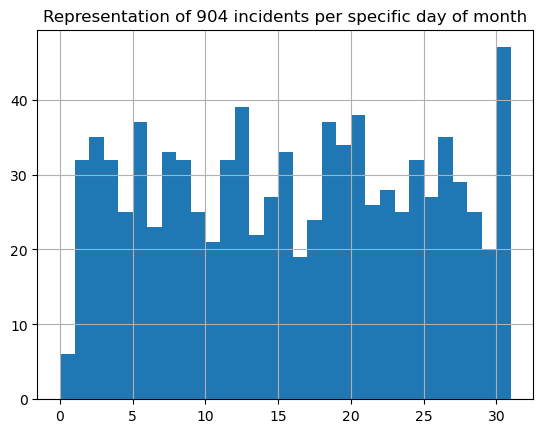

In [38]:
gtd_adj_types.iday.hist(bins = 31)
plt.title('Representation of 904 incidents per specific day of month')
plt.xlabel = 'day of month'
plt.ylabel = 'occurences'
plt.show()

In [39]:
gtd_adj_types.iday.median()

15.0

#### I only have six 0's of 904 entries. Since this is such a small number but I would prefer to keep the data, I will convert all 0 values to 15 to represent the midpoint of the month. This is a form of imputing by median.

In [40]:
gtd_adj_types['iday'].replace({0: 15}, inplace=True)
gtd_adj_types['iday'].unique()

array([12, 13, 19, 25, 26, 28,  2,  3,  6,  8,  9, 15, 17, 20, 21,  5, 14,
       22, 24, 31,  1,  4, 29,  7, 10, 16, 27, 30, 18, 23, 11],
      dtype=int64)

#### Now I can create a datetime column. pd_todatetime is giving me trouble for one reason or another (probably because the columns are integers and not strings or datetimes), so I've decided to just use .apply() with a lambda function across rows on all three date columns.

In [41]:
gtd_adj_types['date'] = gtd_adj_types.apply(lambda row: datetime.datetime(row['iyear'], row['imonth'], row['iday']), axis=1)
gtd_adj_types.head()

,eventid,iyear,imonth,iday,extended,city,latitude,longitude,specificity,vicinity,...,nwound,propextent,addnotes,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date
17,197001120001,1970,1,12,0,New York City,40.697132,-73.931351,1.0,0,...,0,3.0,"One half hour after the bomb explosion, an ano...",Hewitt Project,-9,-9,0,-9,None,1970-01-12
19,197001130001,1970,1,13,0,Seattle,47.610786,-122.331306,1.0,0,...,0,3.0,The store was a White owned business operating...,Hewitt Project,-9,-9,0,-9,None,1970-01-13
22,197001190002,1970,1,19,0,Seattle,47.610786,-122.331306,1.0,0,...,0,3.0,Witnesses observed three African American male...,Hewitt Project,-9,-9,0,-9,None,1970-01-19
23,197001190003,1970,1,19,0,Seattle,47.610786,-122.331306,1.0,0,...,0,0.0,Judith and Silas Bissell were both members of ...,Hewitt Project,-9,-9,0,-9,None,1970-01-19
30,197001250002,1970,1,25,0,New York City,40.697132,-73.931351,1.0,0,...,2,3.0,Police do not believe that this attack was rel...,Hewitt Project,-9,-9,0,-9,None,1970-01-25


#### Time to lose those old columns and move the new date column to the far left for easy visiblity. 

In [42]:
col_list = list(gtd_adj_types.columns)
col_list.insert(1, col_list.pop())
col_drop = ['iyear','imonth','iday']

gtd_adj_types = gtd_adj_types[col_list]
gtd_adj_types.drop(columns = col_drop, inplace = True)

In [43]:
gtd_adj_types.head()

,eventid,date,extended,city,latitude,longitude,specificity,vicinity,crit1,crit2,...,nkillter,nwound,propextent,addnotes,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
17,197001120001,1970-01-12,0,New York City,40.697132,-73.931351,1.0,0,1,1,...,0,0,3.0,"One half hour after the bomb explosion, an ano...",Hewitt Project,-9,-9,0,-9,None
19,197001130001,1970-01-13,0,Seattle,47.610786,-122.331306,1.0,0,1,1,...,0,0,3.0,The store was a White owned business operating...,Hewitt Project,-9,-9,0,-9,None
22,197001190002,1970-01-19,0,Seattle,47.610786,-122.331306,1.0,0,1,1,...,0,0,3.0,Witnesses observed three African American male...,Hewitt Project,-9,-9,0,-9,None
23,197001190003,1970-01-19,0,Seattle,47.610786,-122.331306,1.0,0,1,1,...,0,0,0.0,Judith and Silas Bissell were both members of ...,Hewitt Project,-9,-9,0,-9,None
30,197001250002,1970-01-25,0,New York City,40.697132,-73.931351,1.0,0,1,1,...,0,2,3.0,Police do not believe that this attack was rel...,Hewitt Project,-9,-9,0,-9,None


In [44]:
gtd_adj_types.isna().any()

eventid         False
date            False
extended        False
city            False
latitude        False
longitude       False
specificity     False
vicinity        False
crit1           False
crit2           False
crit3           False
success         False
suicide         False
attacktype1     False
targtype1       False
targsubtype1    False
target1         False
natlty1         False
gname           False
guncertain1     False
weaptype1       False
weapsubtype1    False
weapdetail      False
nkill           False
nkillter        False
nwound          False
propextent      False
addnotes        False
dbsource        False
INT_LOG         False
INT_IDEO        False
INT_MISC        False
INT_ANY         False
related         False
dtype: bool

In [45]:
gtd_adj_types.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 17 to 210889
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   eventid       900 non-null    object        
 1   date          900 non-null    datetime64[ns]
 2   extended      900 non-null    int64         
 3   city          900 non-null    object        
 4   latitude      900 non-null    float64       
 5   longitude     900 non-null    float64       
 6   specificity   900 non-null    category      
 7   vicinity      900 non-null    category      
 8   crit1         900 non-null    category      
 9   crit2         900 non-null    category      
 10  crit3         900 non-null    category      
 11  success       900 non-null    category      
 12  suicide       900 non-null    category      
 13  attacktype1   900 non-null    category      
 14  targtype1     900 non-null    category      
 15  targsubtype1  900 non-null    category   

#### Great - I've got a datetime column, all features contain correct datatypes, I imputed all null values, and we're down to 34 columns. We're all set to look at a few summary statistics - we'll do some quick definitions and a few manual glances, but most of this will take place in EDA. 

In [46]:
gtd_clean = gtd_adj_types

In [47]:
#profile = ProfileReport(gtd_clean, title="GTD Profiling Report")

In [48]:
#profile.to_notebook_iframe()

#### I cannot get ydata profiling to work -will need to ask mentor about this.

In [49]:
gtd_clean.describe()

,date,extended,latitude,longitude,nkill,nkillter,nwound
count,900,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,1982-03-18 01:02:24,0.006667,38.170673,-84.065183,3.240000,0.021111,24.976667
min,1970-01-12 00:00:00,0.000000,-37.472800,-126.843571,0.000000,0.000000,0.000000
25%,1972-02-29 00:00:00,0.000000,34.217528,-87.681229,0.000000,0.000000,0.000000
50%,1976-12-01 00:00:00,0.000000,40.697132,-73.931351,0.000000,0.000000,0.000000
75%,1984-02-28 06:00:00,0.000000,40.697132,-73.931351,0.000000,0.000000,0.000000
max,2021-05-22 00:00:00,1.000000,54.307000,124.643340,1385.000000,5.000000,10878.000000
std,NaN,0.081422,6.449361,18.313311,65.250763,0.255308,512.520243


#### This is a bit odd. It looks like nkill, nkillter, and nwound features contain non-zero values but are 0 in every quartile. This indicates some massive skewing. Let's take a look.

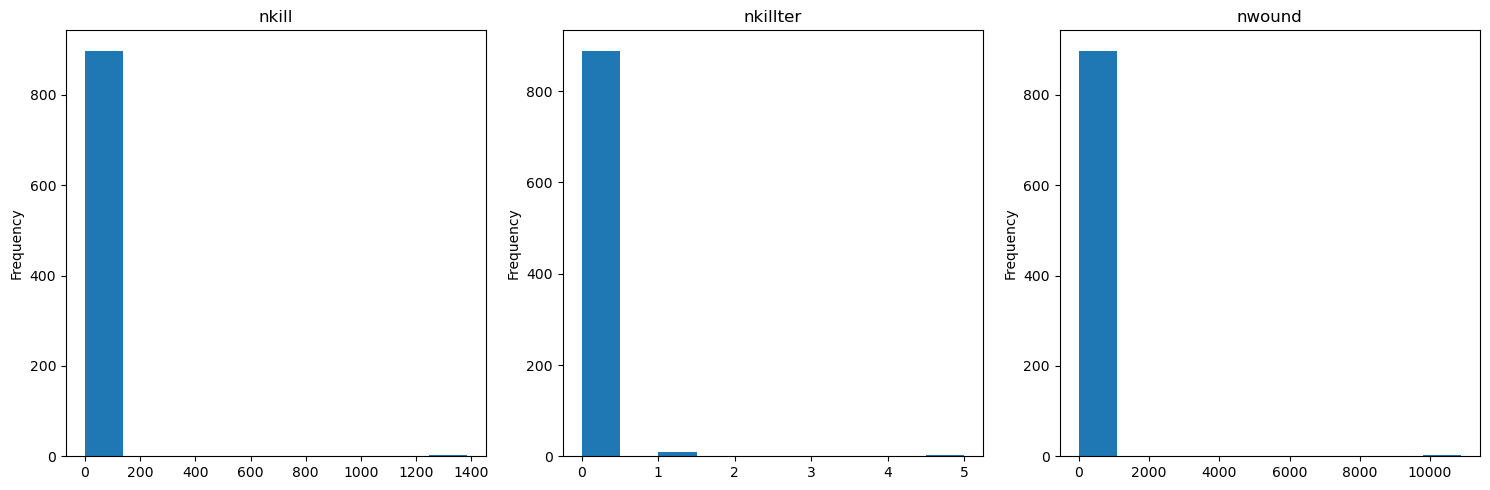

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histograms for each feature on separate subplots
gtd_clean['nkill'].plot(kind='hist', ax=axes[0], title='nkill')
gtd_clean['nkillter'].plot(kind='hist', ax=axes[1], title='nkillter')
gtd_clean['nwound'].plot(kind='hist', ax=axes[2], title='nwound')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [51]:
gtd_clean.nkill.value_counts()

nkill
0       821
1        51
2        17
4         2
3         2
8         2
1385      2
7         1
11        1
13        1
Name: count, dtype: int64

In [52]:
gtd_clean.nkillter.value_counts()

nkillter
0    889
1      9
5      2
Name: count, dtype: int64

In [53]:
gtd_clean.nwound.value_counts()

nwound
0        773
1         56
2         23
3         14
4          9
5          5
6          4
13         2
8          2
10878      2
10         1
12         1
36         1
53         1
17         1
74         1
7          1
32         1
29         1
182        1
Name: count, dtype: int64

#### It looks like in most cases, few people are killed or wounded, so this would be skewed regardless - but major outliers affect the distribution heavily. It appears I have a duplicate according to nkill and nwound. Let's take a look.

In [54]:
gtd_clean.loc[gtd_clean.nkill == 1385]

,eventid,date,extended,city,latitude,longitude,specificity,vicinity,crit1,crit2,...,nkillter,nwound,propextent,addnotes,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
73134,200109110004,2001-09-11,0,New York City,40.697132,-73.931351,1.0,0,1,1,...,5,10878,1.0,This attack was one of four related incidents ...,CETIS,0,1,1,1,"200109110004, 200109110005, 200109110006, 2001..."
73135,200109110005,2001-09-11,0,New York City,40.697132,-73.931351,1.0,0,1,1,...,5,10878,1.0,This attack was one of four related incidents ...,CETIS,0,1,1,1,"200109110004, 200109110005, 200109110006, 2001..."


In [55]:
pd.set_option('display.max_colwidth', None)
gtd_clean.loc[gtd_clean.eventid == '200109110005'].addnotes

73135    This attack was one of four related incidents (cf. 200109110004-07). Flight attendant, Robert Fangman, called a United Airlines office in San Francisco and spoke with Marc Policastro. He reported the hijacking and said that both pilots had been killed. He also reported that a flight attendant was stabbed and said that the hijackers were flying the plane. United Flight 175 departed from Boston's Logan International Airport at 8:14 am local time. At 8:47 am, air traffic control received the first indications that the plane was hijacked. Since the airplane impacted the South Tower at 9:03 am, the length of the hijacking was at least 16 minutes. The second aircraft seized was United Airlines flight 175, which was scheduled to depart from Logan at 8:00 and fly directly to Los Angeles. Details on the number of people wounded in the attacks are very difficult to confirm The numbers reported in the GTD are conservative estimates for immediate casualties, first responders, and resident

#### Ah, it appears the attack on 9/11 has two incidents recorded in New York City because there were two planes hijacked in the event. Ordinarily, I would treat this as a duplicate and remove one - but, the documentation indicates that metrics are divided between all incidents known to be related. Thus, removing one would heavily influence the data, so I will keep both.

#### Still, what would the distributions look like without the outlier of 9/11?

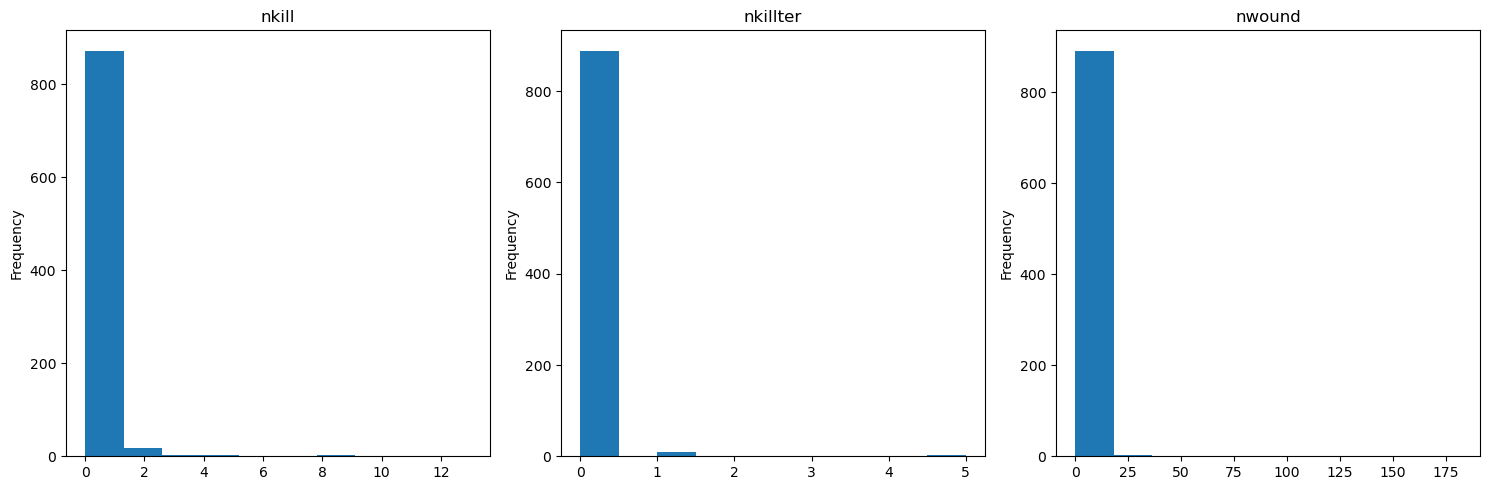

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histograms for each feature on separate subplots
gtd_clean[gtd_clean['nkill'] < 1000]['nkill'].plot(kind='hist', ax=axes[0], title='nkill')
gtd_clean['nkillter'].plot(kind='hist', ax=axes[1], title='nkillter')
gtd_clean[gtd_clean['nwound'] < 10000]['nwound'].plot(kind='hist', ax=axes[2], title='nwound')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#### Even when I remove the outlier of the 9/11 incident, the distributions are still very skewed due to the high number of 0 values. It doesn't make sense to remove outliers given the valuable info they provide in this analysis, and these 0 values are as significant as any other numerical value in this case. So, the distributions aren't pretty, but we will keep it as it is. 

#### Time to save this and move on to EDA!

In [57]:
gtd_clean.to_csv('gtd_clean.csv',index=False)